In [1]:
pip install scikit-learn


Accuracy: 0.4
Confusion Matrix:
[[ 6  0]
 [12  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         6
           1       1.00      0.14      0.25        14

    accuracy                           0.40        20
   macro avg       0.67      0.57      0.38        20
weighted avg       0.80      0.40      0.33        20



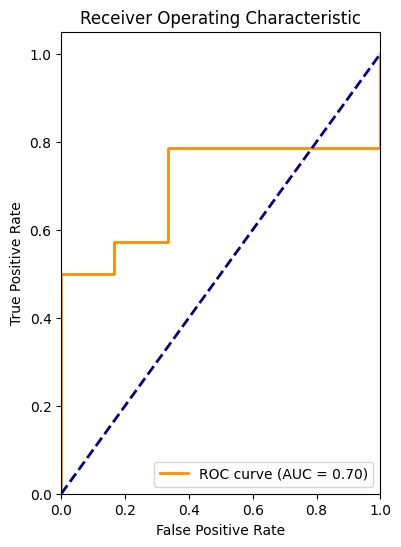

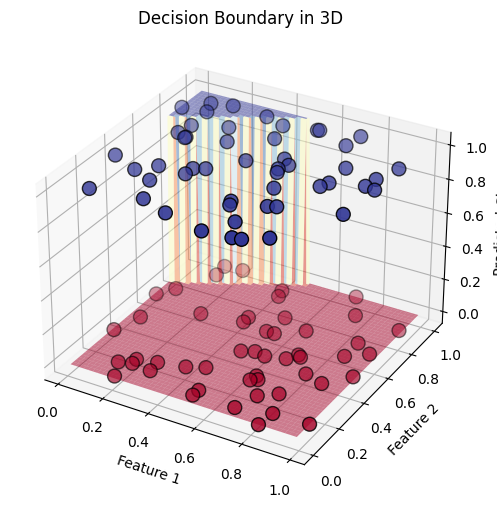

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data (you can replace this with your dataset)
np.random.seed(0)
X = np.random.rand(100, 2)  # Two numerical features
y = np.random.randint(0, 2, 100)  # Binary target variable (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

# Calculate ROC curve and AUC
y_score = model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

# Visualize the ROC curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

# Visualize the decision boundary in 3D
X_grid, Y_grid = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = model.predict(np.c_[X_grid.ravel(), Y_grid.ravel()]).reshape(X_grid.shape)
Z = Z.reshape(X_grid.shape)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.RdYlBu, s=100, edgecolors='k')
ax.plot_surface(X_grid, Y_grid, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Predicted Class')
ax.set_title('Decision Boundary in 3D')

plt.show()
